In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter, MonthLocator



In [2]:
#Reading data from csv
public_trasport_df=pd.read_csv('Resources/Monthly_public_transport_patronage_by_mode.csv')
public_trasport_df


,Year,Month,Month name,Metropolitan train,Metropolitan tram,Metropolitan bus,Regional train,Regional coach,Regional bus
0,2018,1,January,"16,809,932","15,231,368","7,568,547","1,466,256","116,568","721,229"
1,2018,2,February,"19,554,477","16,980,925","10,487,311","1,522,981","103,197","1,118,494"
2,2018,3,March,"22,659,010","19,832,126","11,528,895","1,809,774","117,180","1,224,816"
3,2018,4,April,"20,312,040","16,919,872","9,592,750","1,684,827","107,480","946,218"
4,2018,5,May,"22,768,447","17,691,427","11,263,486","1,790,656","109,456","1,258,704"
...,...,...,...,...,...,...,...,...,...
61,2023,2,February,"12,831,622","12,894,448","8,608,284","1,424,645","77,949","1,096,006"
62,2023,3,March,"16,527,142","15,292,063","10,301,621","1,869,164","88,964","1,247,122"
63,2023,4,April,"13,288,137","12,402,173","8,124,564","1,469,224","89,335","938,444"
64,2023,5,May,"15,312,507","12,760,569","9,848,630","1,743,181","95,859","1,222,849"


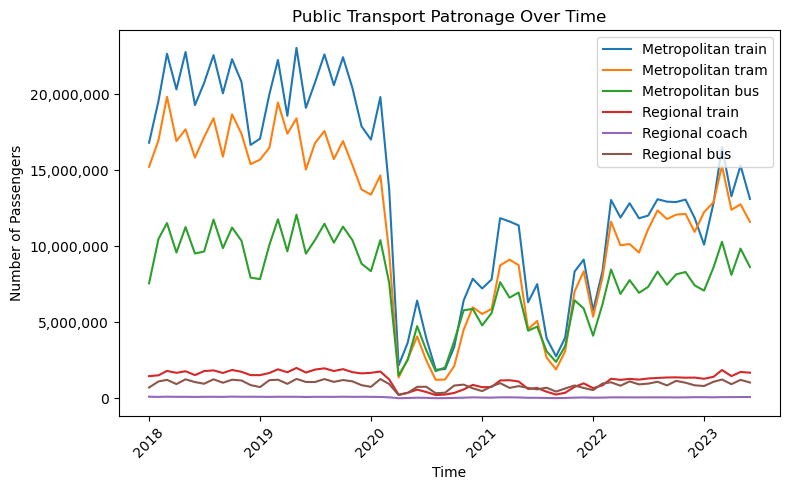

In [3]:
# Convert the string numbers with commas to integers
for column in public_trasport_df.iloc[:,3:]:
    public_trasport_df[column] = public_trasport_df[column].str.replace(',', '').astype(int)
    
#Create a combined time column
public_trasport_df["Time"]=pd.to_datetime(public_trasport_df[["Year","Month"]].assign(DAY=1))

def comma_formatter(x, pos):
    return '{:,.0f}'.format(x)

#Plotting
plt.figure(figsize=(8, 5))
modes_of_transport=["Metropolitan train", "Metropolitan tram", "Metropolitan bus", "Regional train", "Regional coach", "Regional bus"]
for mode in modes_of_transport:
                    plt.plot(public_trasport_df["Time"],public_trasport_df[mode],label=mode)
plt.title('Public Transport Patronage Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Passengers')
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(comma_formatter))

plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

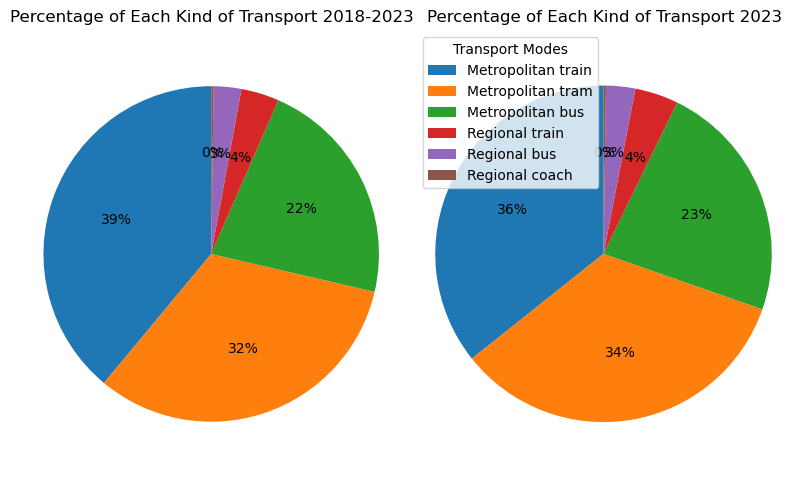

In [4]:
# Summing up the total for each transport mode

mode_total = public_trasport_df.loc[:,["Metropolitan train", "Metropolitan tram", "Metropolitan bus", "Regional train", "Regional coach", "Regional bus"]].sum()
mode_2023= public_trasport_df.loc[public_trasport_df["Year"]==2023,["Metropolitan train", "Metropolitan tram", "Metropolitan bus", "Regional train", "Regional coach", "Regional bus"]].sum()
# Sort the dataframe in descending order
sorted_mode_total = mode_total.sort_values(ascending=False)
sorted_mode_2023 = mode_2023.sort_values(ascending=False)


# Plotting the pie chart
fig, ax = plt.subplots(1, 2, figsize=(8, 5))
ax[0].pie(sorted_mode_total, labels=None, autopct='%1.0f%%', startangle=90)
ax[1].pie(sorted_mode_2023, labels=None, autopct='%1.0f%%', startangle=90)

ax[0].set_title("Percentage of Each Kind of Transport 2018-2023")
ax[1].set_title("Percentage of Each Kind of Transport 2023")

# Adding legend to the second subplot (or you can add to the first based on preference)
ax[1].legend(sorted_mode_total.index, title="Transport Modes", loc="best")

ax[0].axis('equal')  # Ensure the pie is drawn as a circle.
ax[1].axis('equal')  # Ensure the pie is drawn as a circle.

plt.tight_layout()
plt.show()